# Exploratory Data Analysis (EDA) Pipeline

EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods [[1]](https://en.wikipedia.org/wiki/Exploratory_data_analysis).
 More formally, it refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations [[2]](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15).

![EDA](data/image.png)

## 0 - Setup the environment

### 0.1. Load libraries

In [1]:
import csv
import sys
import scipy
import warnings
import matplotlib
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

### 0.2. Check versions

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sk.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 2.2.0
sklearn: 0.19.1
scipy: 1.0.0
seaborn: 0.8.1
pandas: 0.23.0
numpy: 1.14.3
Python: 3.6.5 (v3.6.5:f59c0932b4, Mar 28 2018, 17:00:18) [MSC v.1900 64 bit (AMD64)]


### 0.3. More adjustments

In [3]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
matplotlib.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

## 1 - Data Collection

In [4]:
# Import the data
data = pd.read_csv("data/housing.csv")

In [5]:
data.sample(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5510,-118.42,33.99,38.0,740.0,171.0,599.0,194.0,4.0893,248900.0,<1H OCEAN


In [6]:
# Features
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [7]:
# shape
print(data.shape)

(20640, 10)


In [8]:
#columns*rows
data.size

206400

In [9]:
data['population'].unique()

array([ 322., 2401.,  496., ..., 3060., 2707., 6912.])

In [10]:
population = data['population'].value_counts()
population.head()

891.0     25
761.0     24
1227.0    24
850.0     24
1052.0    24
Name: population, dtype: int64

In [11]:
data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [12]:
data.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [13]:
data.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12105,-117.34,34.00,27.0,321.0,64.0,214.0,67.0,3.1750,101600.0,INLAND
5850,-118.32,34.18,49.0,192.0,41.0,83.0,38.0,3.0179,118800.0,<1H OCEAN
6195,-117.89,34.09,37.0,1055.0,280.0,538.0,206.0,2.4167,181300.0,<1H OCEAN


In [14]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2 - Data Cleaning

In [15]:
#How many NA elements in every column
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## 3 - Data Preprocessing

It refers to the transformations applied to our data before feeding it to the algorithm.

**N.B.** Preprocessing and generation pipelines depend on a model type

- Removing Target column (id)
- Sampling (without replacement)
- Making part of iris unbalanced and balancing (with undersampling and SMOTE)
- Introducing missing values and treating them (replacing by average values)
- Noise filtering
- Data discretization
- Normalization and standardization
- PCA analysis
- Feature selection (filter, embedded, wrapper)

## 4 - Visualization

It's the presentation of data in a pictorial or graphical format. It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns.

### 4.1. Scatter plot

In [17]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

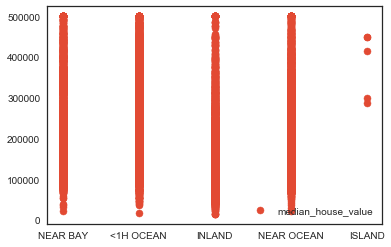

In [18]:
# Modify the graph above by assigning each species an individual color.
x=data["ocean_proximity"]
y=data["median_house_value"]
plt.scatter(x, y)
plt.legend()
plt.show()

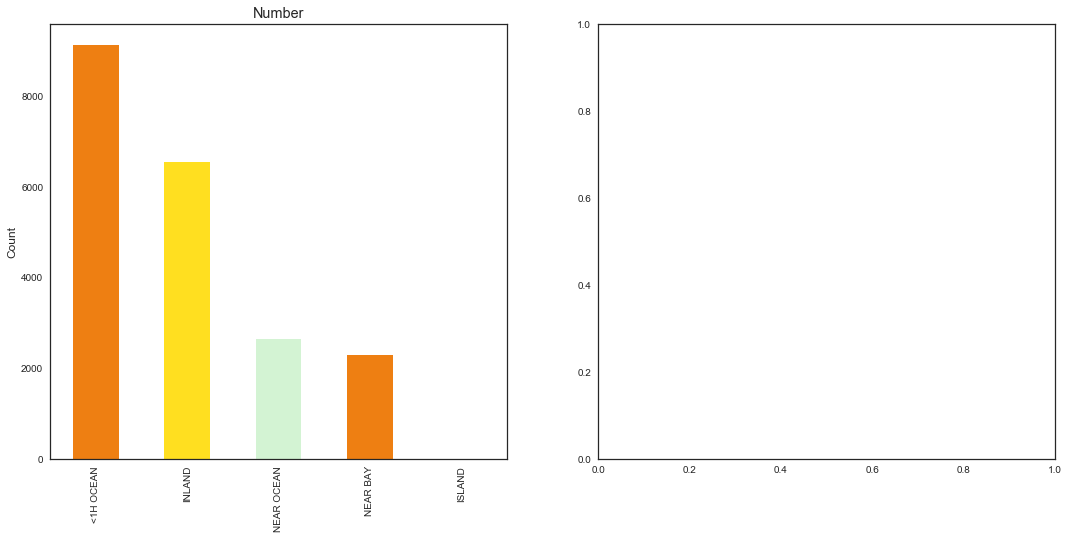

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['ocean_proximity'].value_counts().plot.bar(color=['#EE7F12','#FFDF20','#D3F3D3'],ax=ax[0])
ax[0].set_title('Number')
ax[0].set_ylabel('Count')
plt.show()

### 4.2. Box

<Figure size 432x288 with 0 Axes>

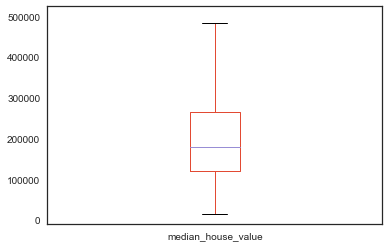

<Figure size 432x288 with 0 Axes>

In [20]:
data["median_house_value"].plot(kind='box')
plt.figure()
#This gives us a much clearer idea of the distribution of the input attributes:

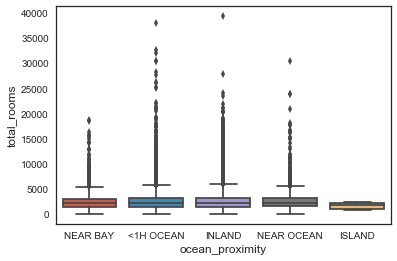

In [21]:
# To plot the species data using a box plot:
sns.boxplot(x="ocean_proximity", y="total_rooms", data=data )
plt.show()

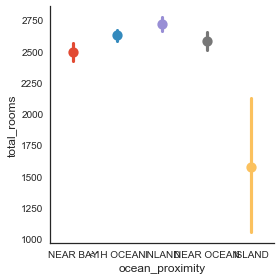

In [22]:
sns.factorplot('ocean_proximity','total_rooms',hue='ocean_proximity',data=data)
plt.show()